In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:

#Reading Data
dfRaces = pd.read_csv("data\\races.csv")
dfResults = pd.read_csv("data\\results.csv")
dfConstructors = pd.read_csv("data\constructors.csv").set_index("constructorId")

#Merging the races and results dataset
dfRaces=dfRaces.merge(dfResults,how="left",on=["raceId"])

#Some races whose results were not in the dataset
dfRaces.dropna(inplace=True)

#Re-indexing to merge with drivers data
dfRaces=dfRaces.set_index(["driverId"])

#Merging with drivers data and constructors data
dfDrivers = pd.read_csv("data\\drivers.csv").set_index("driverId")
df3 = dfRaces.merge(dfDrivers,how="left",on="driverId")
df3 = df3.merge(dfConstructors,how="left",on=["constructorId"])

#Concatenating forename and surname to one name and dropping the forename and surname
df3["Drivers_Name"]= df3["forename"]+" " + df3["surname"]
df3.drop(["forename","surname"],axis=1,inplace=True)



def getRace():
    id= int(input("Enter Query ID"))
    return df3.loc[:,['raceId', 'year', 'round', 'circuitId', "GP_Name","Constructors_Name","Drivers_Name","points","laps","position"]].loc[df3["raceId"]==id]


# Dropping data i might not need for analysis 
df3.drop(['time_x',
       'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'resultId', 'constructorId', 'number_x', 'grid',
       'positionText', 'positionOrder','time_y',
       'milliseconds',  'rank',
       'statusId', 'driverRef', 'number_y', 'code', 'dob',
        'url_y',"constructorRef","url"],axis=1,inplace=True)

# Renaming some columns
df3.rename({"name_x":"GP_Name","nationality_x":"Drivers_Nationality","name_y":"Constructors_Name",'nationality_y':"constructors_Nationality"},inplace=True,axis=1)

# Changing DataTypes
df3['date']= pd.to_datetime(df3['date'])

df3['fastestLapTime'].min()






'0:55.404'

In [5]:
df3.loc[df3["raceId"]==847]

,raceId,year,round,circuitId,GP_Name,date,position,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,Drivers_Nationality,Constructors_Name,constructors_Nationality,Drivers_Name
20923,847,2011,7,7,Canadian Grand Prix,2011-06-12,1,25.0,70.0,69,1:16.956,204.007,British,McLaren,British,Jenson Button
20924,847,2011,7,7,Canadian Grand Prix,2011-06-12,2,18.0,70.0,69,1:17.217,203.317,German,Red Bull,Austrian,Sebastian Vettel
20925,847,2011,7,7,Canadian Grand Prix,2011-06-12,3,15.0,70.0,65,1:19.572,197.300,Australian,Red Bull,Austrian,Mark Webber
20926,847,2011,7,7,Canadian Grand Prix,2011-06-12,4,12.0,70.0,70,1:19.138,198.382,German,Mercedes,German,Michael Schumacher
20927,847,2011,7,7,Canadian Grand Prix,2011-06-12,5,10.0,70.0,68,1:19.054,198.593,Russian,Renault,French,Vitaly Petrov
20928,847,2011,7,7,Canadian Grand Prix,2011-06-12,6,8.0,70.0,68,1:19.148,198.357,Brazilian,Ferrari,Italian,Felipe Massa
20929,847,2011,7,7,Canadian Grand Prix,2011-06-12,7,6.0,70.0,70,1:20.213,195.723,Japanese,Sauber,Swiss,Kamui Kobayashi
20930,847,2011,7,7,Canadian Grand Prix,2011-06-12,8,4.0,70.0,69,1:20.371,195.339,Spanish,Toro Rosso,Italian,Jaime Alguersuari
20931,847,2011,7,7,Canadian Grand Prix,2011-06-12,9,2.0,70.0,68,1:20.316,195.472,Brazilian,Williams,British,Rubens Barrichello
20932,847,2011,7,7,Canadian Grand Prix,2011-06-12,10,1.0,70.0,69,1:19.507,197.461,Swiss,Toro Rosso,Italian,Sébastien Buemi


 1. How many races have been held in the Formula 1 Dataset

In [6]:
totalRaces = len(df3["raceId"].unique())
totalRaces # 1091 as at 2023-07-30



1091

In [7]:
df3.loc[df3["Drivers_Name"]=="George Russell"]

,raceId,year,round,circuitId,GP_Name,date,position,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,Drivers_Nationality,Constructors_Name,constructors_Nationality,Drivers_Name
24215,1010,2019,1,1,Australian Grand Prix,2019-03-17,16,0.0,56.0,55,1:28.713,215.197,British,Williams,British,George Russell
24234,1011,2019,2,3,Bahrain Grand Prix,2019-03-31,15,0.0,56.0,14,1:37.313,200.211,British,Williams,British,George Russell
24255,1012,2019,3,17,Chinese Grand Prix,2019-04-14,16,0.0,54.0,51,1:37.283,201.716,British,Williams,British,George Russell
24274,1013,2019,4,73,Azerbaijan Grand Prix,2019-04-28,15,0.0,49.0,42,1:47.251,201.497,British,Williams,British,George Russell
24296,1014,2019,5,4,Spanish Grand Prix,2019-05-12,17,0.0,65.0,64,1:22.382,203.418,British,Williams,British,George Russell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,1106,2023,8,7,Canadian Grand Prix,2023-06-18,\N,0.0,53.0,44,1:17.097,203.634,British,Mercedes,German,George Russell
26006,1107,2023,9,70,Austrian Grand Prix,2023-07-02,7,6.0,71.0,48,1:09.160,224.765,British,Mercedes,German,George Russell
26024,1108,2023,10,9,British Grand Prix,2023-07-09,5,10.0,52.0,41,1:31.124,232.733,British,Mercedes,German,George Russell
26045,1109,2023,11,11,Hungarian Grand Prix,2023-07-23,6,8.0,70.0,48,1:22.158,191.966,British,Mercedes,German,George Russell


2. What is the average number of laps per race?

In [8]:
#Based on the highest number of laps per race
AverageLaps = np.round(df3.loc[df3['position']== str(1)]['laps'].mean())
AverageLaps  #65 



65.0

3. Which driver has won the most races?

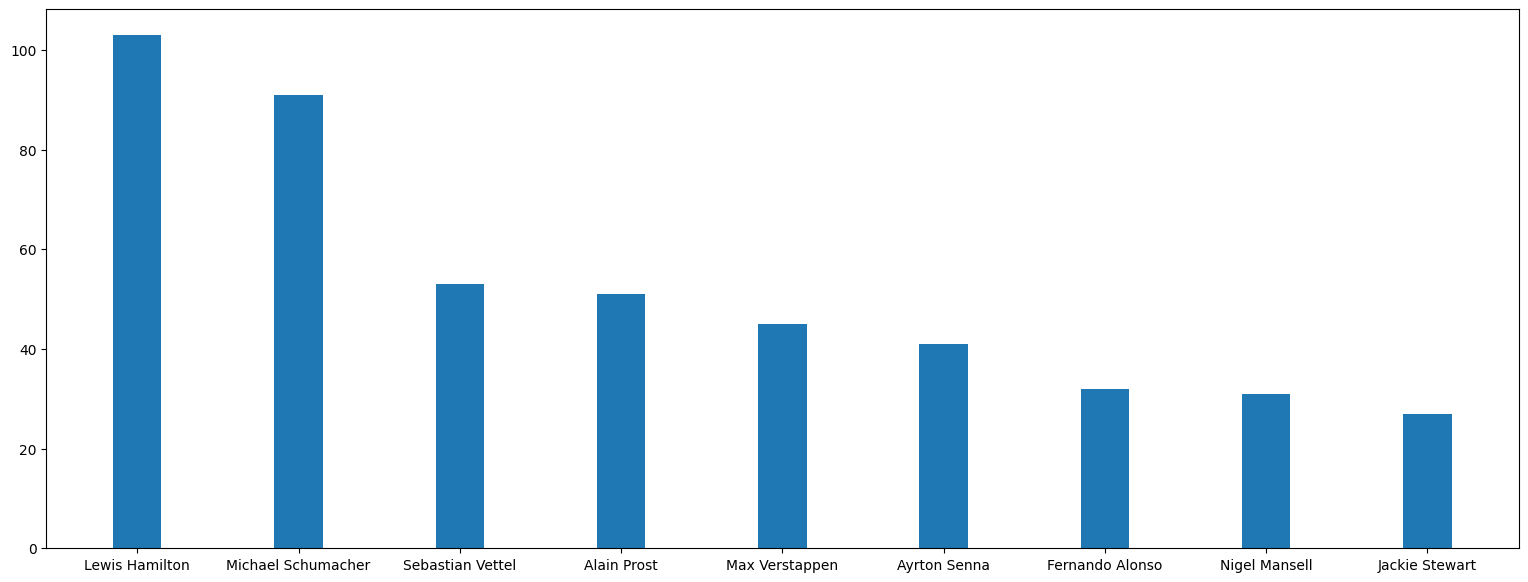

In [9]:
drivers = df3.loc[df3['position']== str(1)]
top10 = drivers['Drivers_Name'].value_counts()[:9]

plt.figure(figsize=(19,7))
plt.bar(top10.index,top10.values,width=[0.3]) #Lewis Hamilton
plt.show()



4. Which constructor has won the most races?

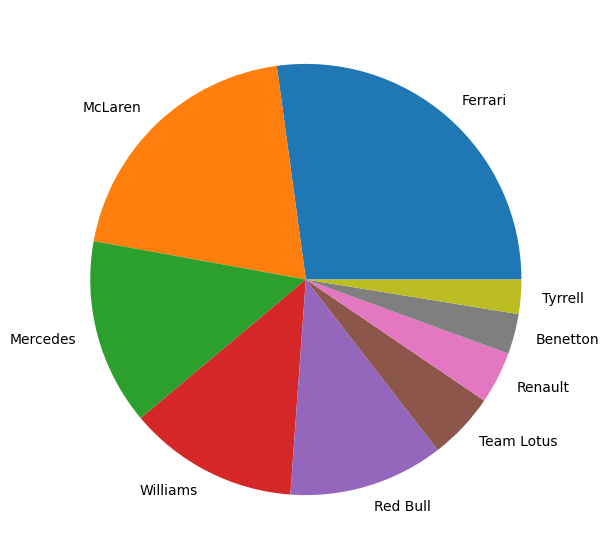

In [10]:
constructor = df3.loc[df3["position"]==str(1)]["Constructors_Name"].value_counts()[:9]
plt.figure(figsize=(19,7))
plt.pie(labels=constructor.index,x=constructor.values) #Ferrari
plt.show()


5. How many wins does  a specific driver have per GP?

In [11]:
GPs = df3['GP_Name'].unique()

#Enter the GP Name as a parameter in the winnerPerGp function to get a list of top 5 winners in the gp

def winnerPerGp(gpName): 
    df = df3.loc[(df3['GP_Name']==gpName)]
    return df.loc[df['position']=='1']['Drivers_Name'].value_counts().head()
      

     


winnerPerGp('Australian Grand Prix')

Gps = df3['GP_Name'].unique()
Gps


array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Chinese Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix',
       'Monaco Grand Prix', 'Turkish Grand Prix', 'British Grand Prix',
       'German Grand Prix', 'Hungarian Grand Prix', 'European Grand Prix',
       'Belgian Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Brazilian Grand Prix',
       'Abu Dhabi Grand Prix', 'Canadian Grand Prix', 'French Grand Prix',
       'United States Grand Prix', 'San Marino Grand Prix',
       'Austrian Grand Prix', 'Argentine Grand Prix',
       'Luxembourg Grand Prix', 'Portuguese Grand Prix',
       'Pacific Grand Prix', 'South African Grand Prix',
       'Mexican Grand Prix', 'Korean Grand Prix', 'Detroit Grand Prix',
       'Dutch Grand Prix', 'Dallas Grand Prix',
       'United States Grand Prix West', 'Swiss Grand Prix',
       'Caesars Palace Grand Prix', 'Swedish Grand Prix',
       'Indianapolis 500', 'Moroccan Grand Prix', 'Pes

6. What is the fastest lap time recorded in the dataset?

In [12]:
df3.loc[df3['fastestLapTime']==df3['fastestLapTime'].min()]
# 0:55.404 by George Rusell  at Sakhir Grand Prix





,raceId,year,round,circuitId,GP_Name,date,position,points,laps,fastestLap,fastestLapTime,fastestLapSpeed,Drivers_Nationality,Constructors_Name,constructors_Nationality,Drivers_Name
24928,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,9,3.0,87.0,80,0:55.404,230.214,British,Mercedes,German,George Russell


7. Which driver has the most fastest laps?

In [13]:
# dfLaps.loc[dfLaps['position']==1]['Drivers_Name'].value_counts()
df3.loc[:,['fastestLapTime',"Drivers_Name"]]

,fastestLapTime,Drivers_Name
0,1:28.020,Jenson Button
1,1:29.066,Rubens Barrichello
2,1:28.916,Jarno Trulli
3,1:28.416,Timo Glock
4,1:28.712,Fernando Alonso
...,...,...
26075,1:50.994,Daniel Ricciardo
26076,1:50.486,Logan Sargeant
26077,1:49.907,Nico Hülkenberg
26078,1:53.138,Carlos Sainz


8. List winner of each race, with race name and date



In [14]:
df3.loc[df3['position']==str(1)].loc[:,['Drivers_Name','GP_Name','date']]

,Drivers_Name,GP_Name,date
0,Jenson Button,Australian Grand Prix,2009-03-29
20,Jenson Button,Malaysian Grand Prix,2009-04-05
40,Sebastian Vettel,Chinese Grand Prix,2009-04-19
60,Jenson Button,Bahrain Grand Prix,2009-04-26
80,Jenson Button,Spanish Grand Prix,2009-05-10
...,...,...,...
25980,Max Verstappen,Canadian Grand Prix,2023-06-18
26000,Max Verstappen,Austrian Grand Prix,2023-07-02
26020,Max Verstappen,British Grand Prix,2023-07-09
26040,Max Verstappen,Hungarian Grand Prix,2023-07-23


9. How many different circuits are included in the dataset?

In [15]:

dfCircuits = pd.read_csv("data\Circuits.csv")
dfCircuits = dfCircuits.merge(df3,how="left",on="circuitId")
len(dfCircuits['name'].unique()) #77 Circuits



77

10. How many different countries have hosted Formula 1 races in the dataset

In [16]:
countries = dfCircuits.loc[:,['circuitId', 'circuitRef', 'name', 'location', 'country','GP_Name']]["country"].unique()
len(countries) #35 Countries

35

11. Some countries seem to have more than 1 circuit so let's do a circuit and country query

In [17]:


arr = [[[i,list(set(dfCircuits.loc[dfCircuits['country']==i]['name'].unique()))] for i in countries]]
arr



[[['Australia', ['Adelaide Street Circuit', 'Albert Park Grand Prix Circuit']],
  ['Malaysia', ['Sepang International Circuit']],
  ['Bahrain', ['Bahrain International Circuit']],
  ['Spain',
   ['Montjuïc',
    'Circuit de Barcelona-Catalunya',
    'Valencia Street Circuit',
    'Circuit de Pedralbes',
    'Circuito de Jerez',
    'Jarama']],
  ['Turkey', ['Istanbul Park']],
  ['Monaco', ['Circuit de Monaco']],
  ['Canada',
   ['Circuit Mont-Tremblant',
    'Circuit Gilles Villeneuve',
    'Mosport International Raceway']],
  ['France',
   ['Charade Circuit',
    'Circuit Paul Ricard',
    'Rouen-Les-Essarts',
    'Le Mans',
    'Circuit de Nevers Magny-Cours',
    'Dijon-Prenois',
    'Reims-Gueux']],
  ['UK', ['Donington Park', 'Silverstone Circuit', 'Brands Hatch', 'Aintree']],
  ['Germany', ['Hockenheimring', 'Nürburgring', 'AVUS']],
  ['Hungary', ['Hungaroring']],
  ['Belgium', ['Nivelles-Baulers', 'Zolder', 'Circuit de Spa-Francorchamps']],
  ['Italy',
   ['Autodromo Internazion